In [1]:
import experiment_framework as ef
import fast_model_improved as fmi
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [2]:
# Load the graph from the file
save_path = '/Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/ca-GrQc.gpickle'
try:
    with open(save_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Graph loaded from {save_path}")
except Exception as e:
    print(f"An error occurred while loading the graph: {e}")


Graph loaded from /Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/ca-GrQc.gpickle


In [3]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1238
Number of deinfluenced nodes: 0
Number of susceptible nodes: 4004
influencer {12166, 5767, 4365, 6030, 25487, 9871, 15249, 13202, 17688, 2846, 4771, 6056, 19881, 6442, 12971, 1321, 23084, 11561, 22827, 6064, 17585, 15538, 5172, 3765, 25910, 9397, 17848, 19575, 9018, 9659, 8254, 832, 26180, 1353, 14540, 15821, 21583, 2770, 10967, 7039, 18649, 14430, 18276, 17015, 19052, 3053, 25719, 6387, 12151, 5631}


In [4]:
# Run simulation for different values of k
k_deinfluencers_ls = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # Different values of k to test
deinfluencers_list = ef.select_deinfluencers(k_deinfluencers_ls, model_fixed_influencers)
results = ef.average_results(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

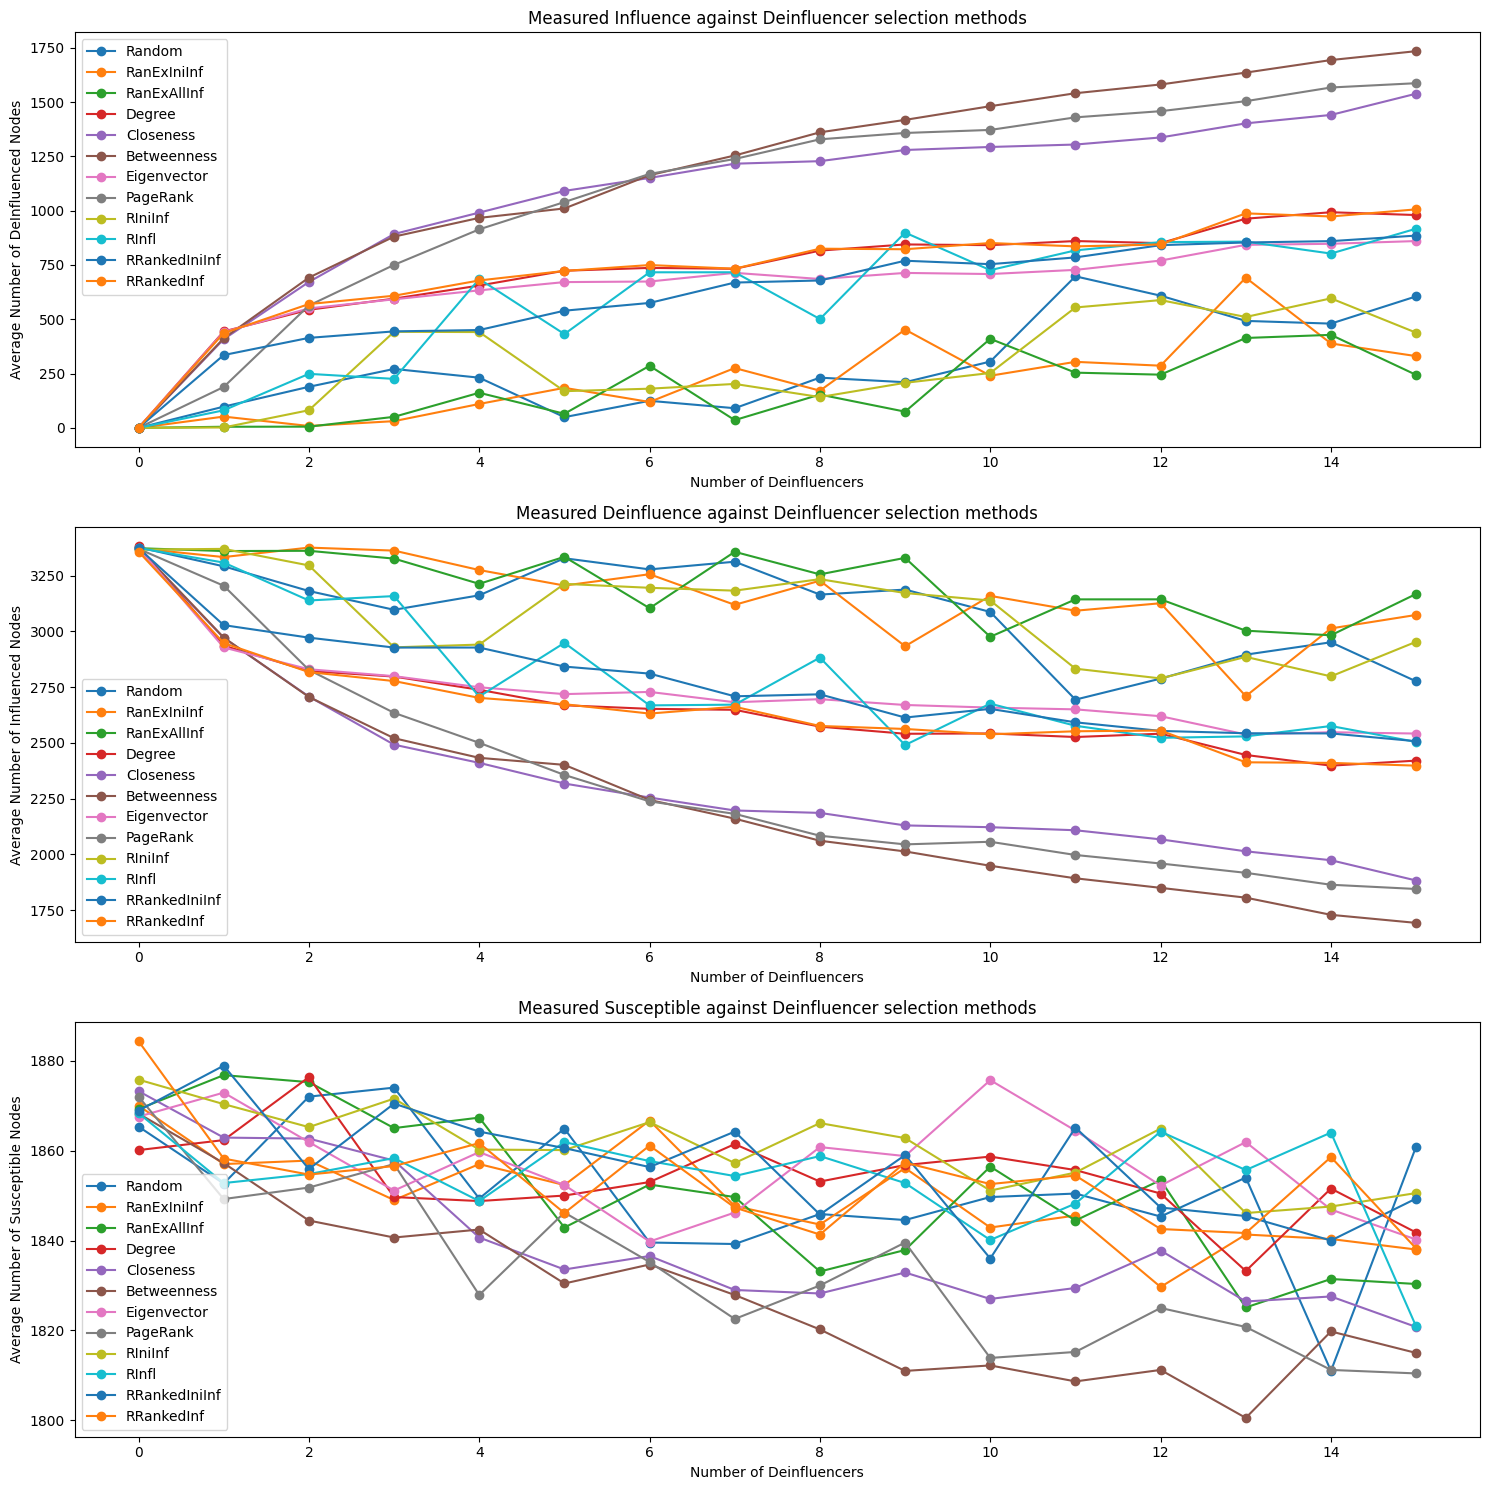

In [5]:
# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Influence against Deinfluencer selection methods')
axs[1].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting

total_nodes = len(G.nodes)

for method in methods:
    influenced_nodes = [results[k][method][0] for k in k_values]
    deinfluenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, influenced_nodes, label=method, marker='o')
    axs[1].plot(k_values, deinfluenced_nodes, label=method, marker='o')
    axs[2].plot(k_values, susceptible_nodes, label=method, marker='o')

axs[0].legend()
axs[0].set_xlabel('Number of Deinfluencers')
axs[0].set_ylabel('Average Number of DeInfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Number of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Number of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()
